Scipy tutorial for the Training on AI/ML with Python. 
Prepared on: 21-03-2023
Ashutosh Gupta

**Importing Scipy**

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

# **Scipy.io**
Read/Write ‘.mat’ files


In [ ]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# **Scipy.linalg**
scipy.linalg contains all the functions in numpy.linalg. plus some other more advanced ones not contained in numpy.linalg.

Another advantage of using scipy.linalg over numpy.linalg is that it is always compiled with BLAS/LAPACK support, while for numpy this is optional. Therefore, the scipy version might be faster depending on how numpy was installed.

**Use**: Solve linear equations, compute norms, inverses, Eigen, SVD, LU, Cholesky, QR or other decompositions of a matrix, etc.


### **Solving linear equations**


In [ ]:
import numpy as np
from scipy import linalg

A = np.array([[1, 2], [3, 4]])
b = np.array([[5], [6]])

x = linalg.inv(A).dot(b)  # slow - by inverting matrix
res = A.dot(x) - b  # check
print(res)

x = linalg.solve(A, b)  # fast
res = A.dot(x) - b  # check
print(res)


[[0.]
 [0.]]
[[0.]
 [0.]]


**Eigenvalue and Singular Value Decomposition**


In [ ]:
A = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])

U, S, V = linalg.svd(A)
U,S,V

(array([[-0.1617463 , -0.98659196,  0.02178164],
        [-0.47456365,  0.09711667,  0.87484724],
        [-0.86523261,  0.13116653, -0.48390895]]),
 array([14.88982544,  0.45294236,  0.29654967]),
 array([[-0.45513179, -0.54511245, -0.70406496],
        [ 0.20258033,  0.70658087, -0.67801525],
        [-0.86707339,  0.45121601,  0.21115836]]))

In [ ]:
L,D  = linalg.eig(A)
L,D

(array([14.06100295+0.j, -0.40887656+0.j,  0.34787361+0.j]),
 array([[-0.16859334, -0.74900954,  0.63431896],
        [-0.47852671, -0.20489871, -0.7540983 ],
        [-0.86173573,  0.63008034,  0.17022108]]))

**Data Fitting with custom functions**

Solve least square problems and pseudo-inverses

$y_i = \sum_{j} c_i f_j (x_i) + ϵ_i$

Lets say, $y_i = c_1 e^{-x_i} + c_2 x_i $, our fitting code will be:

In [ ]:
rng = np.random.default_rng()
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * rng.standard_normal(len(yi))

In [ ]:
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]  #representing the function as N x 2 matrix
c, resid, rank, sigma = linalg.lstsq(A, zi) #actual work ...

xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

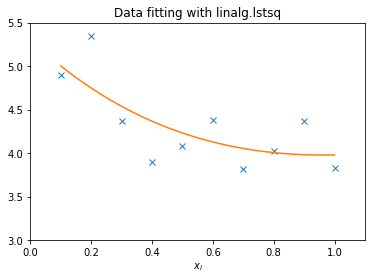

In [ ]:
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

# **Scipy.interpolation**

ND interpolation functions. No extrapolation is allowed. Interpolation is simple and convenient in scipy: The interp1d function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [ ]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise


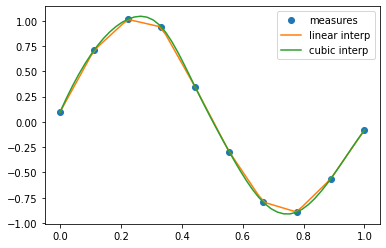

In [ ]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)

linear_results = linear_interp(interpolation_time) #linear interpolation

cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)  #cubic interpolation


plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

# **Scipy.optimize**

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases.

**Fit to custom functions**

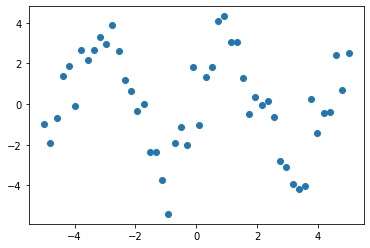

In [ ]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [ ]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

[3.05931973 1.45754553]


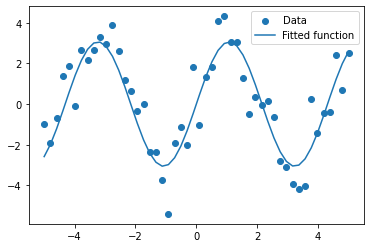

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

**Finding the minimum of a smooth 1-D function**

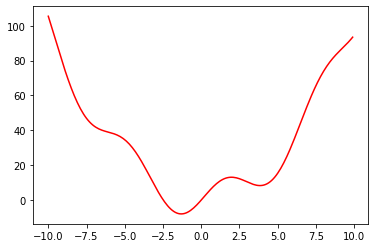

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 10*np.sin(x)


x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x),'r-')


In [ ]:
from scipy import optimize

# The default (Nelder Mead)
print(optimize.minimize(f, x0=0))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -7.945823375615215
        x: [-1.306e+00]
      nit: 5
      jac: [-1.192e-06]
 hess_inv: [[ 8.589e-02]]
     nfev: 12
     njev: 6


**Finding the minimum of a smooth 2-D function**

Text(0.5, 0.92, 'Six-hump Camelback function')

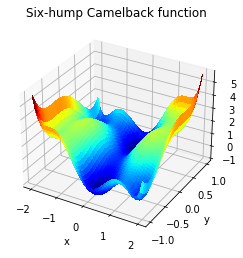

In [ ]:
import numpy as np


# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 5.960e-08 -5.960e-08]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1


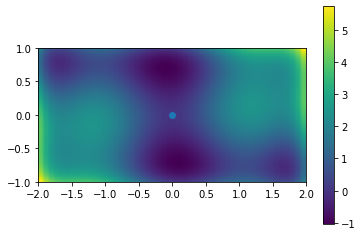

In [ ]:
from scipy import optimize

x_min = optimize.minimize(sixhump, x0=[0, 0])
print(x_min)
plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

#**Scipy.signal**

https://docs.scipy.org/doc/scipy/tutorial/signal.html
### **Convolution, filtering**

In [ ]:
import scipy.signal as signal
x = np.array([1.0, 2.0, 3.0])
h = np.array([0.0, 1.0, 0.0, 0.0, 0.0])
signal.convolve(x, h)

#signal.convolve(x, h, 'same')

array([0., 1., 2., 3., 0., 0., 0.])

### 2D Filtering

<ipython-input-31-49a30050897c>:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face_img = misc.face()
<ipython-input-31-49a30050897c>:14: RuntimeWarning: invalid value encountered in power
  plt.figure(), plt.imshow(np.uint8(deriv2**1.2),'gray')


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f3c2fc06430>)

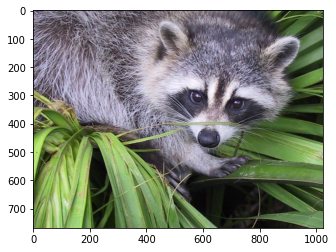

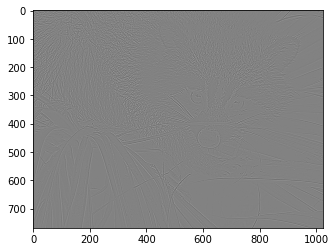

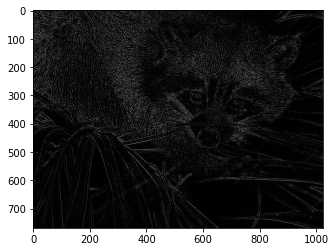

In [31]:
# read the image
import imageio
#imageio.imread('path here')

#or use given
from scipy import misc
face_img = misc.face()
plt.figure(), plt.imshow(face_img)

laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])
deriv2 = signal.convolve2d(face_img[:,:,0],laplacian, mode='same',boundary='symm')

plt.figure(), plt.imshow(deriv2,'gray')
plt.figure(), plt.imshow(np.uint8(deriv2**1.2),'gray')

### FIR and IIR Filter Design
Time-discrete filters can be classified into finite response (FIR) filters and infinite response (IIR) filters. FIR filters can provide a linear phase response, whereas IIR filters cannot. SciPy provides functions for designing both types of filters.

In [32]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

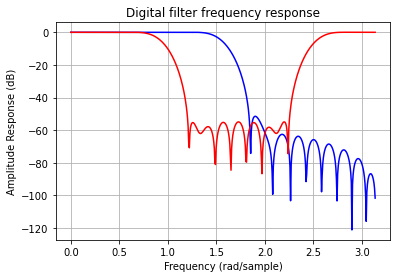

In [33]:
b1 = signal.firwin(40, 0.5)
b2 = signal.firwin(41, [0.3, 0.8])
w1, h1 = signal.freqz(b1)
w2, h2 = signal.freqz(b2)
plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

arbitrary amplitude response FIR filter with linear phase

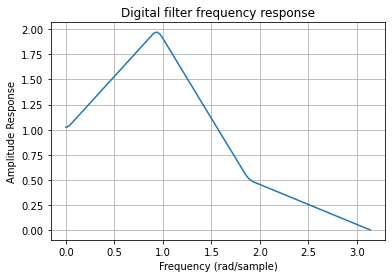

In [35]:
b = signal.firwin2(150, [0.0, 0.3, 0.6, 1.0], [1.0, 2.0, 0.5, 0.0])
w, h = signal.freqz(b)
plt.title('Digital filter frequency response')
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

An IIR filter example

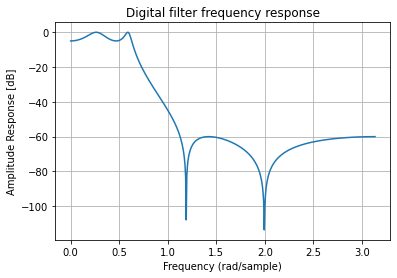

In [36]:
#rp passband ripple size, rs = max-attenuation size (in dB)
b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip') 
w, h = signal.freqz(b, a)
plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

# **Scipy.fftpack**

N-dimensional FFT, DCT, DST  routines with inverses

In [38]:
import numpy as np
from scipy import fftpack

##### 1D Fourier filtering

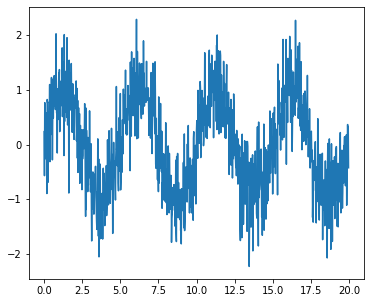

In [37]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

[]

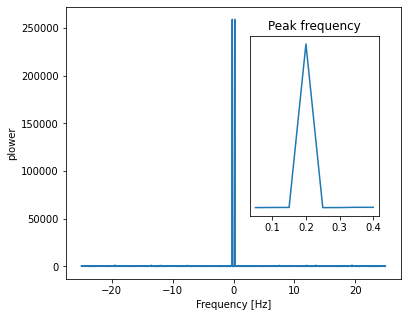

In [39]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[pos_mask][:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


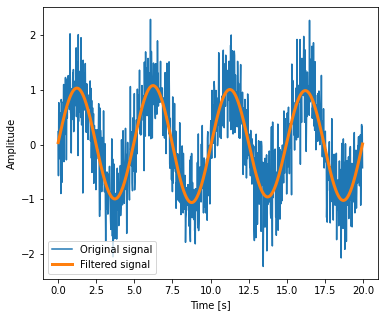

In [40]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

##### Notch filtering in image to suppress sinusoidal pattern

Text(0.5, 1.0, 'Original image')

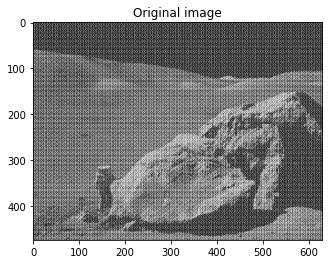

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#https://scipy-lectures.org/_downloads/moonlanding.png
im = plt.imread('moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

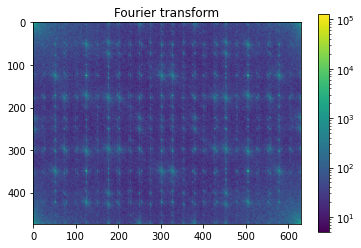

In [44]:
#compute the 2D FFT
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

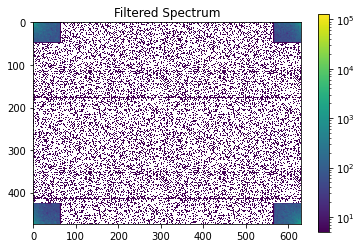

In [45]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

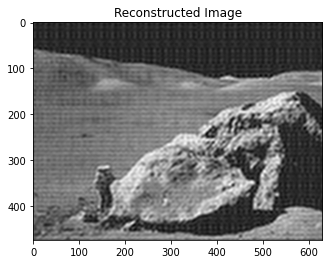

In [46]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

# **Scipy.ndimage**

manipulation of n-dimensional arrays as images.

In [48]:
from scipy import misc  # Load an image
face = misc.face(gray=True)

from scipy import ndimage # Shift, roate and zoom it
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
print(face.shape)
print(zoomed_face.shape)

<ipython-input-48-e9e2541bc013>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


(768, 1024)
(1536, 2048)


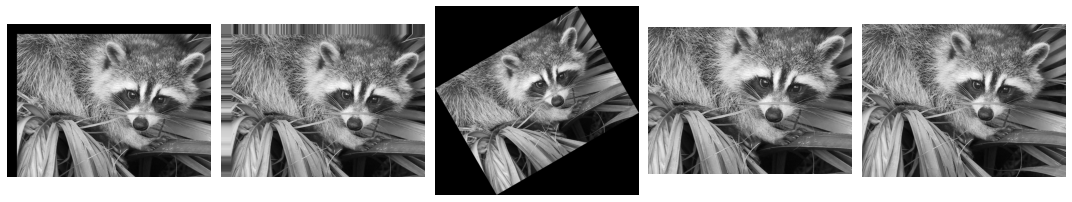

In [49]:
plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

##### Image filtering

In [50]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:]  # crop out square on right
import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

<ipython-input-50-55072e64ea35>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)
<ipython-input-50-55072e64ea35>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy_face = np.copy(face).astype(np.float)


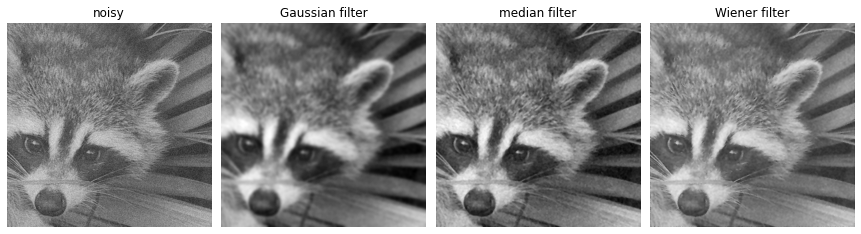

In [51]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

##### Morphological operations
Mathematical morphology stems from set theory. It characterizes and transforms geometrical structures. Binary (black and white) images, in particular, can be transformed using this theory: the sets to be transformed are the sets of neighboring non-zero-valued pixels. The theory was also extended to gray-valued images.

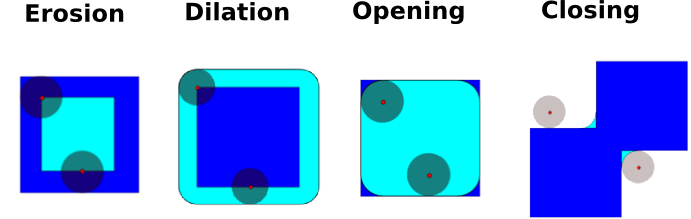

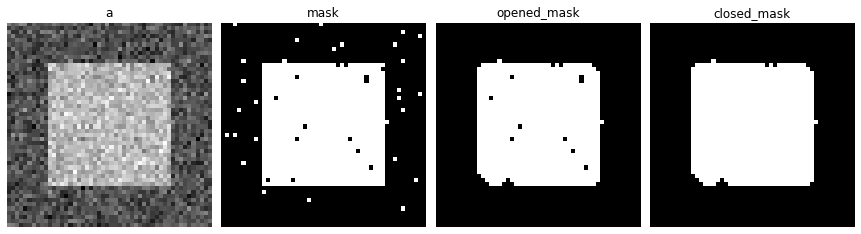

In [52]:
# Generate some binary data
import numpy as np
np.random.seed(0)
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a>=0.5

# Apply mathematical morphology
from scipy import ndimage
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

# Plot
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')
plt.title('a')

plt.subplot(142)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')

plt.subplot(143)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opened_mask')

plt.subplot(144)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.title('closed_mask')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

# **Scipy.Stats**



The main public methods for continuous RVs are:

* rvs: Random Variates
* pdf: Probability Density Function
* cdf: Cumulative Distribution Function
* sf: Survival Function (1-CDF)
* ppf: Percent Point Function (Inverse of CDF)
* isf: Inverse Survival Function (Inverse of SF)
* stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
* moment: non-central moments of the distribution


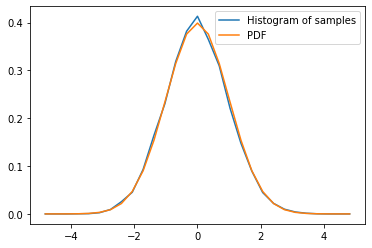

In [53]:
import numpy as np
from scipy import stats

# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

##### 2D kernel density estimation

In [94]:
def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(loc=-1,scale=0.5,size=n)
    m2 = np.random.normal(loc=1,scale=1.0, size=n)
    print(m1)
    print(m2)
    return m1+m2, m1-m2

[-1.31637867 -1.31106222 -0.91811932 ... -1.65680466 -1.5148713
 -0.64993706]
[ 2.78907873  0.24484174  0.19830564 ...  1.06247502 -0.7277748
  2.02821758]


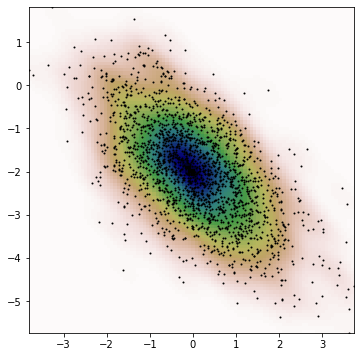

In [95]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

#Then we apply the KDE to the data:

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

#plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()


In [83]:
np.mgrid[1:10:2,1:10:2j]

array([[[ 1.,  1.],
        [ 3.,  3.],
        [ 5.,  5.],
        [ 7.,  7.],
        [ 9.,  9.]],

       [[ 1., 10.],
        [ 1., 10.],
        [ 1., 10.],
        [ 1., 10.],
        [ 1., 10.]]])

# **Scipy.integrate** , **Scipy.special**

In [ ]:
import scipy.integrate as integrate
help(integrate)

In [97]:
import scipy.special as special
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5) #bessel function J2.5

Definite integration

$ I(a,b) = \int_0^1 ax^2 + bx$

In [100]:
from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
print(I)

(1.6666666666666667, 1.8503717077085944e-14)


Example of special functions from 'special' module.  circular drum head anchored at the edge:

In [101]:
from scipy import special
import numpy as np
def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

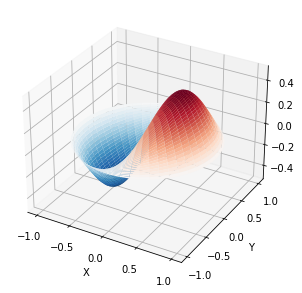

In [102]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

In [103]:
help(special)

Help on package scipy.special in scipy:

NAME
    scipy.special

DESCRIPTION
    Special functions (:mod:`scipy.special`)
    
    .. currentmodule:: scipy.special
    
    Almost all of the functions below accept NumPy arrays as input
    arguments as well as single numbers. This means they follow
    broadcasting and automatic array-looping rules. Technically,
    they are `NumPy universal functions
    <https://numpy.org/doc/stable/user/basics.ufuncs.html#ufuncs-basics>`_.
    Functions which do not accept NumPy arrays are marked by a warning
    in the section description.
    
    .. seealso::
    
       `scipy.special.cython_special` -- Typed Cython versions of special functions
    
    
    Error handling
    
    Errors are handled by returning NaNs or other appropriate values.
    Some of the special function routines can emit warnings or raise
    exceptions when an error occurs. By default this is disabled; to
    query and control the current error handling state the foll